In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters Vector

Load and normalization vector of parameters.

Concatenating all four DataFrames into one.

In [7]:
allpatients = pd.read_csv('Time_Male.csv')
allpatients.head()

,MAX,MIN,RMS,KURTOSIS,SKEWNESS,Status
0,29241.0,-29320.0,6289.637492,1.154522,-0.278947,Zdrowy
1,22856.0,-29453.0,5107.071001,2.979691,0.072257,Zdrowy
2,22061.0,-23299.0,6599.787734,0.712650,-0.001332,Zdrowy
3,9884.0,-13521.0,3353.459070,0.969484,0.309495,Zdrowy
4,13997.0,-19188.0,4252.315146,1.981925,-0.035390,Zdrowy


Features has diffrent rows, so they have to be normalized.

In [8]:
features = allpatients.drop(labels='Status', axis=1).columns
for i in features:
    allpatients[i] = (allpatients[i] - np.mean(allpatients[i]))/np.std(allpatients[i])
allpatients.head()

,MAX,MIN,RMS,KURTOSIS,SKEWNESS,Status
0,2.264942,-1.416545,0.316645,0.756835,-0.489999,Zdrowy
1,1.073054,-1.437500,-0.343569,2.560710,0.357747,Zdrowy
2,0.924651,-0.467857,0.489798,0.320119,0.180116,Zdrowy
3,-1.348430,1.072796,-1.322592,0.573956,0.930400,Zdrowy
4,-0.580656,0.179885,-0.820770,1.574585,0.097906,Zdrowy


Afterwards data have to be suffled, in order to avoid overfitting

In [9]:
allpatients = allpatients.sample(frac=1).reset_index(drop=True)
allpatients.head()

,MAX,MIN,RMS,KURTOSIS,SKEWNESS,Status
0,-1.174826,0.971168,-0.485154,-0.872142,-0.884860,Chory
1,1.424927,-1.901524,2.058564,-0.175781,-0.413170,Zdrowy
2,-0.267797,-0.770378,0.453181,-0.501060,-1.322900,Chory
3,-1.102025,1.093279,-0.882866,-0.577574,-0.035428,Zdrowy
4,0.262533,0.868436,-0.463480,-0.818367,0.233159,Chory


# PCA

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=3)
pca.fit(allpatients.drop(['Status'], axis=1))
X = pca.transform(allpatients.drop(['Status'], axis=1))
X = pd.DataFrame(X, columns=['A','B','C'])
X['Status'] = allpatients['Status']

In [12]:
from mpl_toolkits.mplot3d import Axes3D

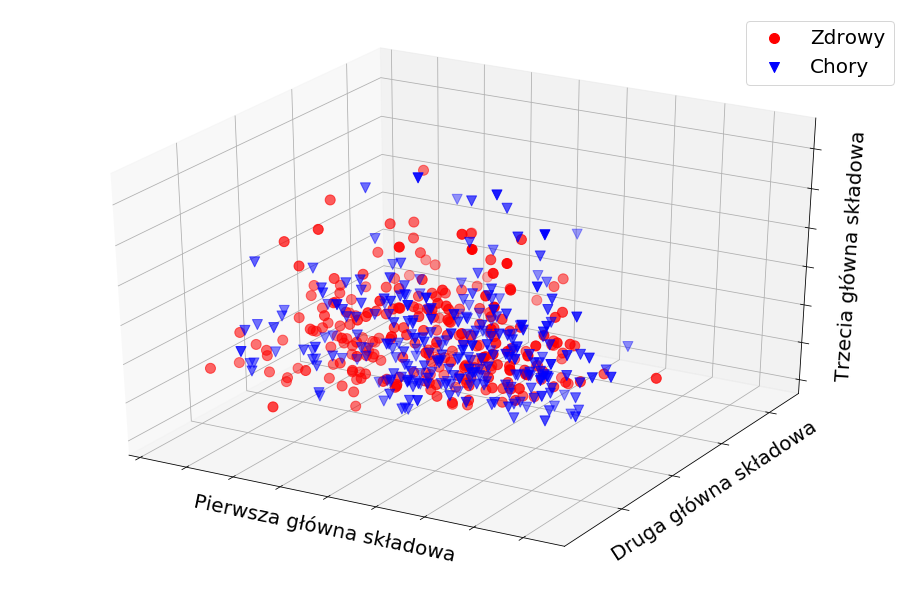

In [13]:
fig = plt.figure()
fig.set_size_inches(16, 10.5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[X['Status']=='Zdrowy']['A'],
           X[X['Status']=='Zdrowy']['B'],
           X[X['Status']=='Zdrowy']['C'],
           s=100,
           c='r',
           marker='o',
           label='Zdrowy')
ax.scatter(X[X['Status']=='Chory']['A'],
           X[X['Status']=='Chory']['B'],
           X[X['Status']=='Chory']['C'],
           s=100,
           c='b',
           marker='v',
           label='Chory')
plt.legend(loc='upper right', frameon = True, fontsize=20)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Pierwsza główna składowa', fontsize=20)
ax.set_ylabel('Druga główna składowa', fontsize=20)
ax.set_zlabel('Trzecia główna składowa', fontsize=20)
plt.show()

# Dummy variables

We'll need to convert categorical features (Status) to dummy variables, because our alghoritm can't understant what means 'healthy'.

In [14]:
status = pd.get_dummies(allpatients['Status'],drop_first=True)

In [15]:
allpatients.drop(['Status'],axis=1,inplace=True)

In [16]:
allpatients['Chory'] = status
allpatients.head()

,MAX,MIN,RMS,KURTOSIS,SKEWNESS,Chory
0,-1.174826,0.971168,-0.485154,-0.872142,-0.884860,0
1,1.424927,-1.901524,2.058564,-0.175781,-0.413170,1
2,-0.267797,-0.770378,0.453181,-0.501060,-1.322900,0
3,-1.102025,1.093279,-0.882866,-0.577574,-0.035428,1
4,0.262533,0.868436,-0.463480,-0.818367,0.233159,0


# Logistic regression algorithm

# Train test split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(allpatients.drop(['Chory'],axis=1), 
                                                    allpatients['Chory'], 
                                                    test_size=0.20, 
                                                    random_state=42)

# Training and predicting

In [19]:
from sklearn.linear_model import LogisticRegression

In [38]:
logModel = LogisticRegression(C = 0.0075, solver='liblinear')
logModel.fit(X_train, y_train)

LogisticRegression(C=0.0075, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [39]:
prediction = logModel.predict(X_test)

# Evaluation
Check precission, recall, f1-score using classification report

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.54      0.51      0.52        55
           1       0.48      0.51      0.50        49

   micro avg       0.51      0.51      0.51       104
   macro avg       0.51      0.51      0.51       104
weighted avg       0.51      0.51      0.51       104



In [24]:
print(confusion_matrix(y_test,prediction))

[[28 27]
 [24 25]]


# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
clf = RandomForestClassifier(n_estimators=350)

In [43]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
prediction = clf.predict(X_test)

# Evaluation

In [45]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.58      0.56      0.57        55
           1       0.53      0.55      0.54        49

   micro avg       0.56      0.56      0.56       104
   macro avg       0.56      0.56      0.56       104
weighted avg       0.56      0.56      0.56       104



In [30]:
print(confusion_matrix(y_test, prediction))

[[31 24]
 [23 26]]


In [31]:
feature_importance = clf.feature_importances_

[Text(0,0,'Maks'),
 Text(0,0,'Min'),
 Text(0,0,'RMS'),
 Text(0,0,'Kurt'),
 Text(0,0,'Skos')]

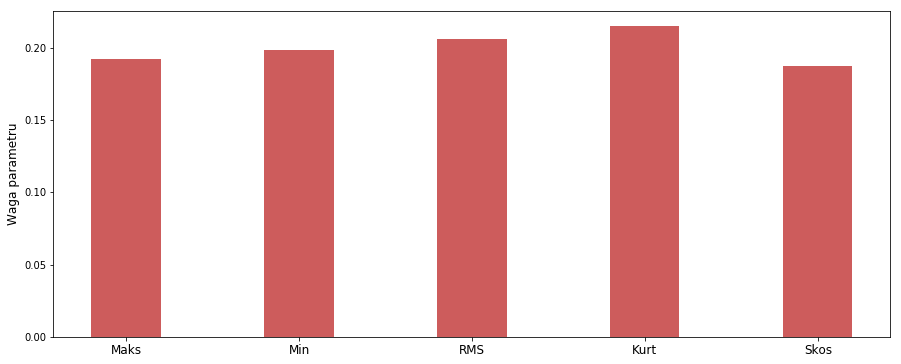

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.grid(b=False)
ind = np.arange(len(feature_importance))  # the x locations for the groups
width = 0.4  # the width of the bars
ax.bar(ind, feature_importance, width, color='IndianRed')
ax.set_ylabel('Waga parametru', fontsize=12)
ax.set_xticks(ind)
ax.set_xticklabels(['Maks', 'Min', 'RMS', 'Kurt', 'Skos'], fontsize=12)

In [33]:
feature_importance

array([0.1922019 , 0.19854994, 0.20642033, 0.21513842, 0.1876894 ])